The data is available as two attached CSV files:

takehome_user_engagement.csv

takehome_users.csv

The data has the following two tables:

__1.__ A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes:
    
    ● name: the user's name
    ● object_id: the user's id
    ● email: email address
    ● creation_source: how their account was created. This takes on one of 5 values:
    
        ○ PERSONAL_PROJECTS: invited to join another user's personal workspace
        ○ GUEST_INVITE: invited to an organization as a guest (limited permissions)
        ○ ORG_INVITE: invited to an organization (as a full member)
        ○ SIGNUP: signed up via the website
        ○ SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
        
    ● creation_time: when they created their account
    ● last_session_creation_time: unix timestamp of last login
    ● opted_in_to_mailing_list: whether they have opted into receiving marketing emails
    ● enabled_for_marketing_drip: whether they are on the regular marketing email drip
    ● org_id: the organization (group of users) they belong to
    ● invited_by_user_id: which user invited them to join (if applicable).


__2.__ A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product.


Defining an __"adopted user"__ as a user who has logged into the product on three separate days in at least one seven-day period, identify which factors predict future user adoption.

We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better -- no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
user_df = pd.read_csv("takehome_users.csv", encoding = "ISO-8859-1")
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
user_df.shape

(12000, 10)

In [5]:
user_engagement_df = pd.read_csv("takehome_user_engagement.csv")
user_engagement_df.head(20)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [6]:
# to check if there is more than 1 user visti per day
len(user_engagement_df[user_engagement_df.visited > 1])

0

In [7]:
# To check if there is any duplicate values
user_engagement_df = user_engagement_df.drop_duplicates()

In [8]:
user_engagement_df.shape

(207917, 3)

In [9]:
user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 6.3+ MB


In [10]:
# convert "time_stamp" column to pandas datetime
user_engagement_df['time_stamp'] = pd.to_datetime(user_engagement_df['time_stamp'], errors='coerce')

In [11]:
# group the user visit to weekly
user_engagement_weekly = user_engagement_df.groupby([user_engagement_df["user_id"], pd.Grouper(key="time_stamp", freq='W')]).sum()
user_engagement_weekly.head()

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-12-01        1
        2013-12-15        1
        2013-12-29        1

In [12]:
def adopted(x):
    if x >= 3:
        return 1
    else:
        return 0
user_engagement_weekly["adopted_user"] = user_engagement_weekly["visited"].apply(adopted)
user_engagement_weekly

visited  adopted_user
user_id time_stamp                       
1       2014-04-27        1             0
2       2013-11-17        1             0
        2013-12-01        1             0
        2013-12-15        1             0
        2013-12-29        1             0
        2014-01-05        1             0
        2014-01-12        1             0
        2014-02-09        3             1
        2014-02-16        2             0
        2014-03-09        1             0
        2014-03-16        1             0
        2014-04-06        1             0
3       2013-03-24        1             0
4       2013-05-26        1             0
5       2013-01-27        1             0
6       2013-12-22        1             0
7       2012-12-23        1             0
10      2013-01-20        1             0
        2013-01-27        1             0
        2013-02-03        1             0
        2013-02-10        2             0
        2013-02-17        2             0
        2013-02-24        1             0
        2013-03-03        3             1
        2013-03-10        2             0
        2013-03-17        2             0
        2013-03-24        2             0
        2013-03-31        1             0
        2013-04-07        1             0
        2013-04-14        3             1
...                     ...           ...
11982   2013-12-08        1             0
11983   2013-08-04        1             0
11984   2014-02-16        1             0
11986   2012-07-01        1             0
11987   2013-03-17        1             0
11988   2014-03-23        4             1
        2014-03-30        2             0
        2014-04-06        3             1
        2014-04-13        2             0
        2014-04-20        2             0
        2014-04-27        1             0
        2014-05-04        4             1
        2014-05-11        1             0
        2014-05-18        3             1
        2014-05-25        5             1
        2014-06-01        3             1
11989   2013-09-08        1             0
11990   2013-07-07        1             0
11991   2014-04-20        1             0
        2014-04-27        1             0
        2014-05-04        1             0
        2014-05-18        1             0
        2014-06-01        1             0
11992   2014-04-13        1             0
11995   2013-10-27        1             0
11996   2013-09-08        1             0
11997   2013-01-20        1             0
11998   2014-04-27        1             0
11999   2012-06-03        1             0
12000   2014-01-26        1             0

[68807 rows x 2 columns]

In [13]:
user_engagement_weekly.drop(columns='visited', inplace=True)
user_engagement_weekly.head()

adopted_user
user_id time_stamp              
1       2014-04-27             0
2       2013-11-17             0
        2013-12-01             0
        2013-12-15             0
        2013-12-29             0

In [14]:
user_engagement_weekly.reset_index(level=1, drop=True, inplace=True)
user_engagement_weekly.head()

,adopted_user
user_id,
1,0
2,0
2,0
2,0
2,0


In [15]:
#Group users by user_id and set adopted to True if there and any three separate days in at least one seven day period
user_engagement_weekly = user_engagement_weekly.groupby('user_id')['adopted_user'].any().to_frame()
user_engagement_weekly.head()

,adopted_user
user_id,
1,False
2,True
3,False
4,False
5,False


In [16]:
user_engagement_weekly.reset_index(inplace=True)
user_engagement_weekly.head()

,user_id,adopted_user
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [17]:
# convert the "adopted_user" column to numeric value
user_engagement_weekly["adopted_user"] = user_engagement_weekly["adopted_user"] * 1
user_engagement_weekly.head()

,user_id,adopted_user
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [18]:
# Merge with users dataframe on object_id column
adopted_df = pd.merge(user_df,user_engagement_weekly, how='left', left_on=['object_id'], right_on=['user_id'])
adopted_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5.0,0.0


In [19]:
adopted_df.adopted_user.value_counts()

0.0    7378
1.0    1445
Name: adopted_user, dtype: int64

In [20]:
len(adopted_df)

12000

In [21]:
print('\nPercentage of users who are adopted users:', round(1445/12000*100,2),'%')


Percentage of users who are adopted users: 12.04 %


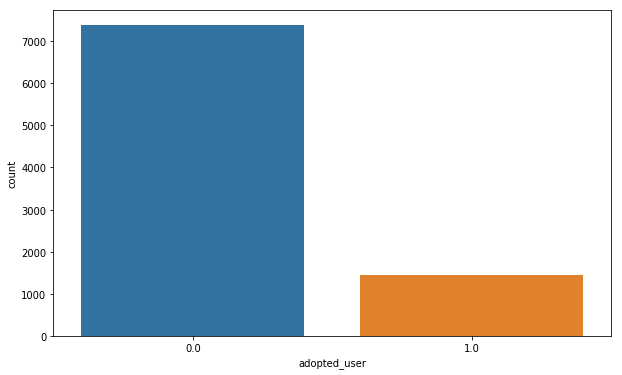

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x="adopted_user", data= adopted_df);

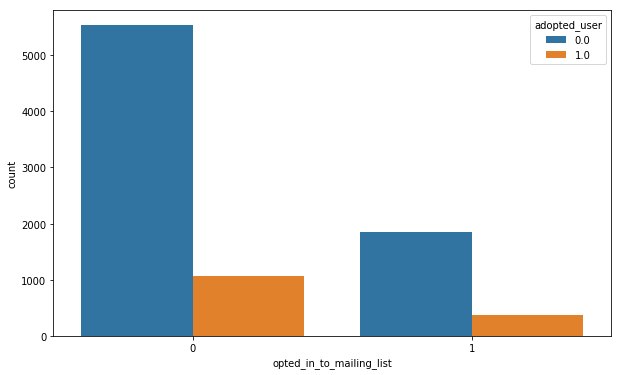

In [23]:
# Explore data for adopted users vs non-adopted users
plt.figure(figsize=(10,6))
sns.countplot(x='opted_in_to_mailing_list', data=adopted_df, hue='adopted_user');
#sns.countplot(x='enabled_for_marketing_drip', data= adopted_df,hue='adopted_user')
#sns.countplot(x='creation_source', data=adopted_df, hue='adopted_user')


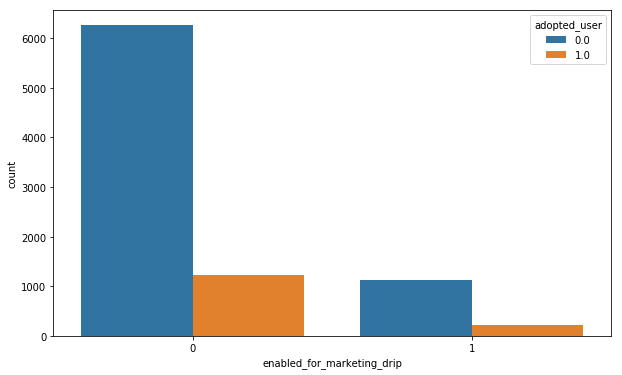

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='enabled_for_marketing_drip', data= adopted_df,hue='adopted_user');

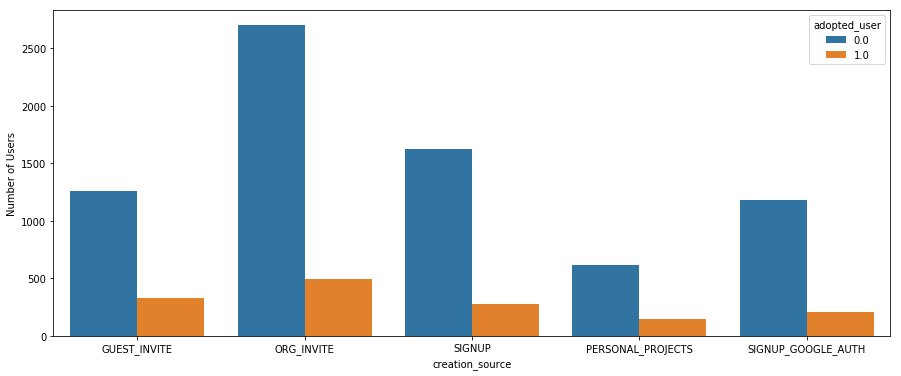

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x='creation_source', data=adopted_df, hue='adopted_user').set_ylabel("Number of Users");

In [26]:
# Fill NaN adopted_users as '0'
adopted_df['adopted_user'] = adopted_df['adopted_user'].fillna(value=0)

In [27]:
adopted_df.adopted_user.value_counts()

0.0    10555
1.0     1445
Name: adopted_user, dtype: int64

In [28]:
adopted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 12 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
user_id                       8823 non-null float64
adopted_user                  12000 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.5+ MB


In [29]:
#drop unwanted columns user_id, email, name, creation_time
adopted_df.drop(columns=['name','email','user_id','creation_time'],inplace=True)

In [30]:
#Use LabelEncoder to convert creation_source feature to numeric values and drop creation_source
#(Alternate way we can create dummies for categorical variable is using pd.get_dummies())
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
adopted_df['creation_source_code'] = LE.fit_transform(adopted_df['creation_source'])
adopted_df.drop(columns=['creation_source'], inplace=True)

In [31]:
# Let's check if we have all numeric features
adopted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 8 columns):
object_id                     12000 non-null int64
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null float64
creation_source_code          12000 non-null int64
dtypes: float64(3), int64(5)
memory usage: 1.1 MB


In [32]:
# set all NaN values to zero
adopted_df[['invited_by_user_id', 'last_session_creation_time']] = adopted_df[['invited_by_user_id', 'last_session_creation_time']].fillna(value=0)

In [33]:
adopted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 8 columns):
object_id                     12000 non-null int64
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted_user                  12000 non-null float64
creation_source_code          12000 non-null int64
dtypes: float64(3), int64(5)
memory usage: 1.1 MB


In [34]:
#Find the correlation between the features
corr = adopted_df.corr()
corr

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_code
object_id,1.000000,0.009651,-0.032370,-0.022040,0.004110,0.001657,0.007481,0.014072
last_session_creation_time,0.009651,1.000000,0.010916,0.012604,0.010231,0.021160,0.232758,0.154509
opted_in_to_mailing_list,-0.032370,0.010916,1.000000,0.483529,0.003432,0.007536,0.010339,-0.004563
enabled_for_marketing_drip,-0.022040,0.012604,0.483529,1.000000,0.009275,0.003431,0.005901,0.001282
org_id,0.004110,0.010231,0.003432,0.009275,1.000000,-0.040868,0.060683,0.012143
invited_by_user_id,0.001657,0.021160,0.007536,0.003431,-0.040868,1.000000,0.017648,-0.664132
adopted_user,0.007481,0.232758,0.010339,0.005901,0.060683,0.017648,1.000000,-0.001549
creation_source_code,0.014072,0.154509,-0.004563,0.001282,0.012143,-0.664132,-0.001549,1.000000


### Import classifiers and split training and testing data

In [43]:
# Import scikit-learn tools, grid search cross validation, and classifiers
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# import Logistic Regression CV Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

In [36]:
# set feature variable(X) and target variable(y)
X = adopted_df.drop(columns=['adopted_user'])
y = adopted_df['adopted_user']

In [37]:
X.shape

(12000, 7)

### Class Imbalance

In [38]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0.0: 10555, 1.0: 1445})


We will use SMOTE technique for the imbalance classes

In [40]:
import imblearn 
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
counter = Counter(y_smote)
print(counter)


Counter({0.0: 10555, 1.0: 10555})


In [41]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=42)

# Show the results of the split
print("X Training set sample size:", (X_train.shape[0]))
print("X Testing set sample size:", (X_test.shape[0]))
print("y Training set sample size:", (y_train.shape[0]))
print("y Testing set sample size:", (y_test.shape[0]))

X Training set sample size: 14777
X Testing set sample size: 6333
y Training set sample size: 14777
y Testing set sample size: 6333


### Logistic Regression

In [44]:
# Setup the hyperparameter grid
param_grid = {'C': np.arange(0.05, 4, 0.8)}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=1000)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs = -1)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.05}
Best score is 0.9200280218606309


In [45]:
print("training set score: %f" % logreg_cv.score(X_train, y_train))
print('\n'"test set score: %f" % logreg_cv.score(X_test, y_test))

training set score: 0.920124

test set score: 0.925637


In [46]:
# calculated predicted class label per sample: pred_lgr
pred_lgr = logreg_cv.predict(X_test)

# print the confusion matrix 
print('\n''Confusion Matrix:''\n', metrics.confusion_matrix(y_test, pred_lgr))


Confusion Matrix:
 [[ 987 2204]
 [   0 3142]]


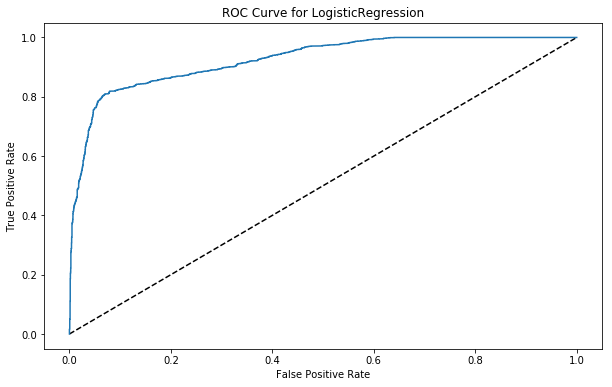

In [47]:
# calculate predicted probabilities for X_test Logistic Regression model
y_pred_prob_lgr = logreg_cv.predict_proba(X_test)[:, 1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lgr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegression')
plt.show()

In [55]:
# calculate AUC for Logistic Regression model
print('AUC Score for Logistic Regression Model', metrics.roc_auc_score(y_test, y_pred_prob_lgr))

AUC Score for Logistic Regression Model 0.9256374498534927


### Random Forest Classifier

In [48]:
# Instantiate and fit the random forest model. 
rf = RandomForestClassifier().fit(X_train, y_train) 

## And score it on your testing data.
print("training set score: %f" % rf.score(X_train, y_train))
print('\n'"test set score: %f" % rf.score(X_test, y_test))

training set score: 1.000000

test set score: 0.916627


In [49]:
# calculated predicted class label per sample: pred_rf
pred_rf = rf.predict(X_test)

# print the confusion matrix 
print('\n''Confusion matrix:''\n', metrics.confusion_matrix(y_test, pred_rf))


Confusion matrix:
 [[2914  277]
 [ 251 2891]]


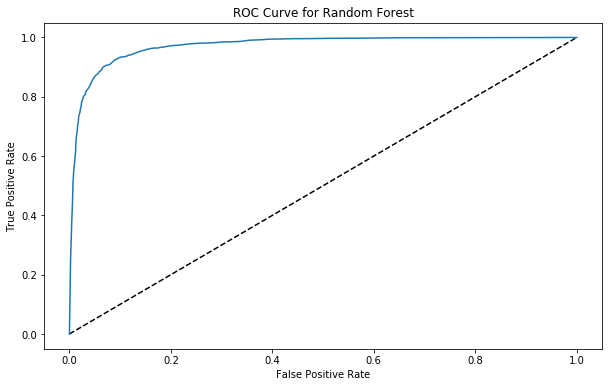

In [50]:
# calculate predicted probabilities
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

In [51]:
# calculate AUC for randomforest model
print('AUC Score for Random Forest Model', metrics.roc_auc_score(y_test, y_pred_prob_rf))

AUC Score for Random Forest Model 0.9717202224349555


In [52]:
# find best parameters with GridSearchCV
# create a list of performace parameters for performace tuning
params = {'max_features': [2,4,6,8],
              'min_samples_leaf': [4, 6, 8, 10],
              'min_samples_split': [3, 7, 8, 10],
         }

In [53]:
# create an instance of the grid search by passing the classifier, parameters 
# and n_jobs=-1 which tells to use multiple cores from user machine.
gs_rf = GridSearchCV(RandomForestClassifier(), params, scoring='roc_auc', n_jobs=-1)
gs_rf = gs_rf.fit(X_train, y_train) 

# View the best AUC score
print('\n''Best score:', gs_rf.best_score_) 

# Get best parameters
print('\n''Best parameters:', gs_rf.best_params_)


Best score: 0.9684401824102198

Best parameters: {'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 7}


#### Identify which factors predict future user adoption

In [54]:
# Explore feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
# Print sorted list of feature importances
feature_importances

,importance
last_session_creation_time,0.636937
org_id,0.114062
object_id,0.092636
invited_by_user_id,0.081916
creation_source_code,0.040766
opted_in_to_mailing_list,0.021379
enabled_for_marketing_drip,0.012303


- 'last_session_creation_time' has the most influence so, to increase the user engagement we can send email notification periodically. 